In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import functools
import pandas as pd
import itertools
%pip install sklearn
import sklearn
import copy
pd.options.mode.chained_assignment = None 
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


In [2]:
df= pd.read_excel('E1(15).xlsx',engine='openpyxl')

In [3]:
df

,RecordingTime [ms],Category Right,Category Left,Pupil Diameter Right [mm],Pupil Diameter Left [mm],Point of Regard Right X [px],Point of Regard Right Y [px],Point of Regard Left X [px],Point of Regard Left Y [px]
0,3105620.263,Fixation,Fixation,3.9805,4.0540,617.9056,302.6742,617.9056,302.6742
1,3105642.826,Fixation,Fixation,3.9625,4.0716,617.5874,324.3978,617.5874,324.3978
2,3105659.969,Fixation,Fixation,3.9122,4.0618,617.3777,339.1483,617.3777,339.1483
3,3105679.855,Fixation,Fixation,4.0013,4.0335,616.3451,349.4069,616.3451,349.4069
4,3105699.726,Fixation,Fixation,3.9776,3.9589,618.2457,346.2565,618.2457,346.2565
...,...,...,...,...,...,...,...,...,...
1544,3157549.936,Fixation,Fixation,3.8531,3.7648,647.1810,315.6187,647.1810,315.6187
1545,3157565.789,Fixation,Fixation,3.7002,3.7098,642.7736,311.7477,642.7736,311.7477
1546,3157626.098,Fixation,Fixation,3.7609,3.7285,626.4296,315.9762,626.4296,315.9762
1547,3157640.193,Fixation,Fixation,3.7052,3.7248,609.6123,310.1399,609.6123,310.1399


In [4]:
df = df[['RecordingTime [ms]','Point of Regard Right X [px]','Point of Regard Right Y [px]','Category Right','Category Left']]

In [5]:
df=df[df['Point of Regard Right X [px]'] !=0]

In [6]:
len(df['Point of Regard Right X [px]'])

1069

In [7]:
df=df[df['Point of Regard Right Y [px]'] !=0]

In [8]:
len(df['Point of Regard Right X [px]'])

1052

In [9]:
#what are the classification
df['Category Left'].unique()

array(['Fixation', 'Saccade', '-', 'Blink'], dtype=object)

In [10]:
df['Category Left'].value_counts()

Fixation    675
Saccade     340
-            25
Blink        12
Name: Category Left, dtype: int64

In [11]:
#keep only Saccade and fixation values
df= df[df['Category Left'].isin( ['Fixation', 'Saccade' ])]

In [12]:
len(df['Point of Regard Right X [px]'])

1015

In [13]:
#what are the classification
df['Category Right'].unique()

array(['Fixation', 'Saccade', 'Blink', '-'], dtype=object)

In [14]:
#keep only Saccade and fixation values
df= df[df['Category Right'].isin( ['Fixation', 'Saccade' ])]

In [15]:
len(df['Point of Regard Right X [px]'])

979

In [16]:
T = df['RecordingTime [ms]']
X = df['Point of Regard Right X [px]']
Y = df['Point of Regard Right Y [px]']

In [17]:
pd.to_numeric(X, errors='coerce')

0       617.9056
1       617.5874
2       617.3777
3       616.3451
4       618.2457
          ...   
1544    647.1810
1545    642.7736
1546    626.4296
1547    609.6123
1548    649.8881
Name: Point of Regard Right X [px], Length: 979, dtype: float64

In [18]:
pd.to_numeric(Y, errors='coerce')

0       302.6742
1       324.3978
2       339.1483
3       349.4069
4       346.2565
          ...   
1544    315.6187
1545    311.7477
1546    315.9762
1547    310.1399
1548    314.5557
Name: Point of Regard Right Y [px], Length: 979, dtype: float64

In [19]:
pd.to_numeric(T, errors='coerce')

0       3105620.263
1       3105642.826
2       3105659.969
3       3105679.855
4       3105699.726
           ...     
1544    3157549.936
1545    3157565.789
1546    3157626.098
1547    3157640.193
1548    3157660.205
Name: RecordingTime [ms], Length: 979, dtype: float64

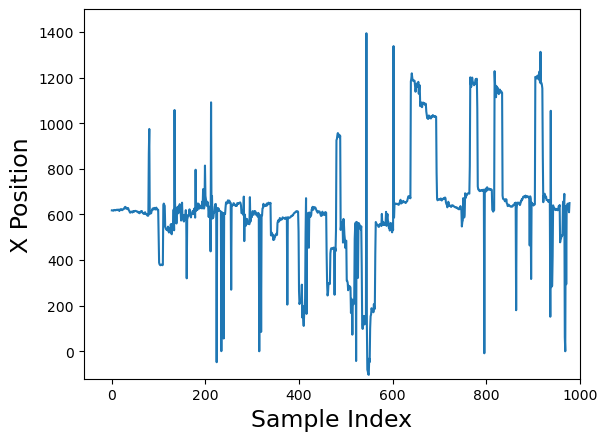

In [20]:
plt.plot(np.array(X))
plt.ylim(-120,1500)
plt.xlim(-60,1000)
plt.ylim()
plt.xlabel('Sample Index',fontsize=17)
plt.ylabel('X Position',fontsize=17)
plt.show()

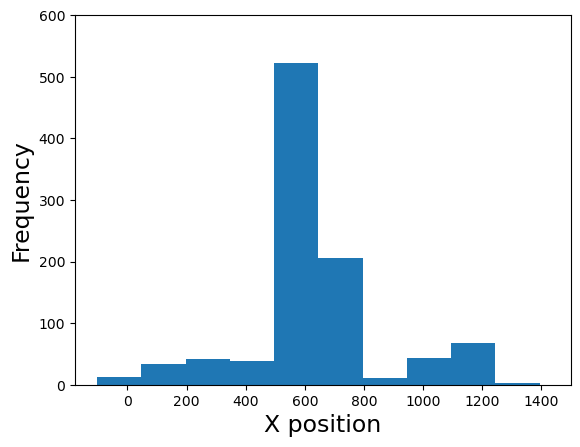

In [21]:
plt.hist(np.array(X))
plt.ylim(0,600)
plt.xlim(right=1500)
plt.xlabel('X position',fontsize=17)
plt.ylabel('Frequency',fontsize=17)
plt.show()

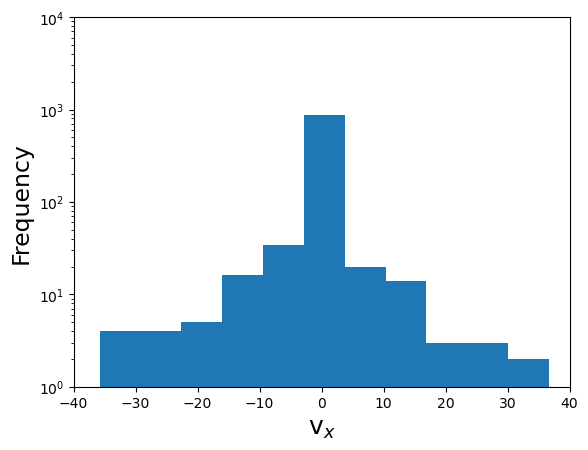

In [22]:
#calculation of x position velocity
vx=np.diff(X)/np.diff(T)
plt.yscale("log")
plt.ylim([1, 10000])
plt.xlim(-40,40)
#plot the x position velocity
plt.hist(vx,bins=15)
plt.xlabel('v$_{x}$',fontsize=18)
plt.ylabel('Frequency',fontsize=17)
plt.show()



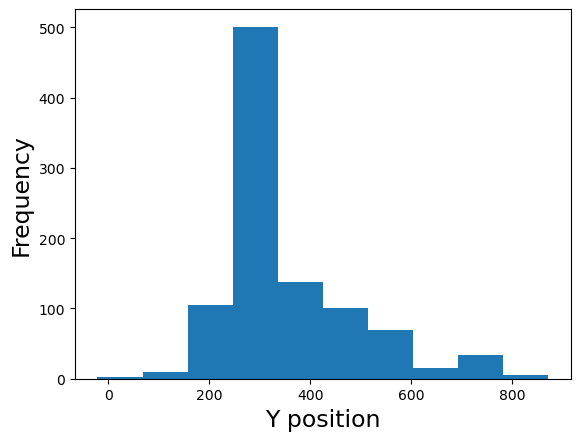

In [23]:
plt.hist(np.array(Y))
plt.xlabel('Y position',fontsize=17)
plt.ylabel('Frequency',fontsize=17)
plt.show()

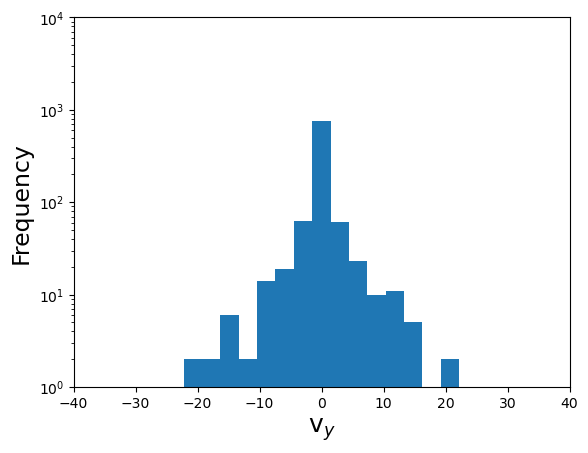

In [24]:
#calculation of y position velocity
vy=np.diff(Y)/np.diff(T)
plt.yscale("log")
plt.ylim([1, 10000])
plt.xlim(-40,40)
#plot the y position velocity
plt.hist(vy,bins=15)
plt.xlabel('v$_{y}$',fontsize=18)
plt.ylabel('Frequency',fontsize=17)
plt.show()

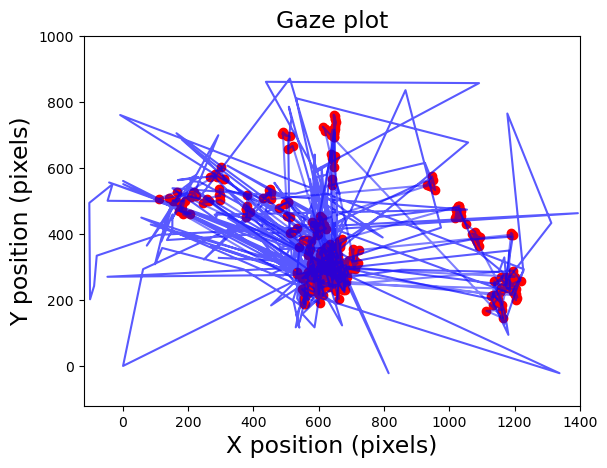

In [25]:

# Separate fixations and saccades into separate dataframes
fixations = df[df['Category Right'] == 'Fixation']
saccades = df[df['Category Right'] == 'Saccade']

# Plot the fixations as a scatter plot
plt.scatter(fixations['Point of Regard Right X [px]'], fixations['Point of Regard Right Y [px]'], color='red')

# Plot a line plot for the fixations
plt.plot(fixations['Point of Regard Right X [px]'], fixations['Point of Regard Right Y [px]'], color='blue', alpha=0.5)

# Plot the saccades as a line plot with lower alpha
plt.plot(saccades['Point of Regard Right X [px]'], saccades['Point of Regard Right Y [px]'], color='blue', alpha=0.65)

plt.xlim(-120,1400)
plt.ylim(-120,1000)

# Set the plot title and axis labels
plt.title('Gaze plot',fontsize=17)
plt.xlabel('X position (pixels)',fontsize=17)
plt.ylabel('Y position (pixels)',fontsize=17)


# Show the plot
plt.show()


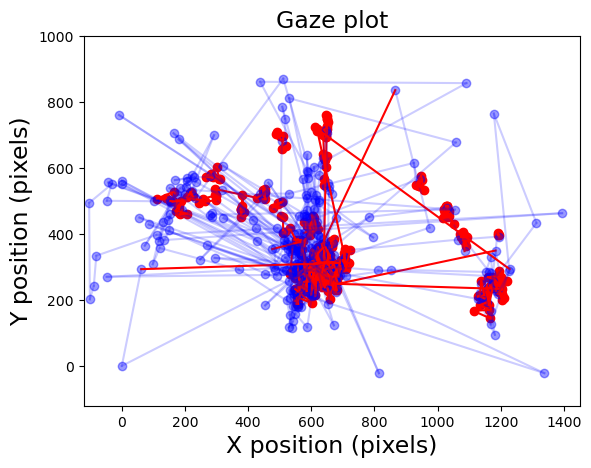

In [26]:
# Separate fixations and saccades into separate dataframes
fixations = df[df['Category Right'] == 'Fixation']
saccades = df[df['Category Right'] == 'Saccade']

# Plot the fixations and saccades as scatter plots
plt.scatter(fixations['Point of Regard Right X [px]'], fixations['Point of Regard Right Y [px]'], color='red')
plt.scatter(saccades['Point of Regard Right X [px]'], saccades['Point of Regard Right Y [px]'], color='blue', alpha=0.4)

# Plot lines for transitions between fixations and saccades
for i in range(1, len(df)):
    if df.iloc[i-1]['Category Right'] == 'Fixation' and df.iloc[i]['Category Right'] == 'Fixation':
        plt.plot([df.iloc[i-1]['Point of Regard Right X [px]'], df.iloc[i]['Point of Regard Right X [px]']], 
                 [df.iloc[i-1]['Point of Regard Right Y [px]'], df.iloc[i]['Point of Regard Right Y [px]']],
                 color='red')
    elif df.iloc[i-1]['Category Right'] == 'Saccade' and df.iloc[i]['Category Right'] == 'Saccade':
        plt.plot([df.iloc[i-1]['Point of Regard Right X [px]'], df.iloc[i]['Point of Regard Right X [px]']], 
                 [df.iloc[i-1]['Point of Regard Right Y [px]'], df.iloc[i]['Point of Regard Right Y [px]']],
                 color='blue', alpha=0.2)
    elif df.iloc[i-1]['Category Right'] == 'Saccade' and df.iloc[i]['Category Right'] == 'Fixation':
        plt.plot([df.iloc[i-1]['Point of Regard Right X [px]'], df.iloc[i]['Point of Regard Right X [px]']], 
                 [df.iloc[i-1]['Point of Regard Right Y [px]'], df.iloc[i]['Point of Regard Right Y [px]']],
                 color='blue', alpha=0.2)
    elif df.iloc[i-1]['Category Right'] == 'Fixation' and df.iloc[i]['Category Right'] == 'Saccade':
        plt.plot([df.iloc[i-1]['Point of Regard Right X [px]'], df.iloc[i]['Point of Regard Right X [px]']], 
                 [df.iloc[i-1]['Point of Regard Right Y [px]'], df.iloc[i]['Point of Regard Right Y [px]']],
                 color='red')

# Set the plot title and axis labels
plt.title('Gaze plot',fontsize=17)
plt.xlabel('X position (pixels)',fontsize=17)
plt.ylabel('Y position (pixels)',fontsize=17)

plt.xlim(-120,1450)
plt.ylim(-120,1000)

# Show the plot
plt.show()




In [27]:
vs = np.sqrt(vx**2 + vy**2)

Text(0, 0.5, 'Frequency')

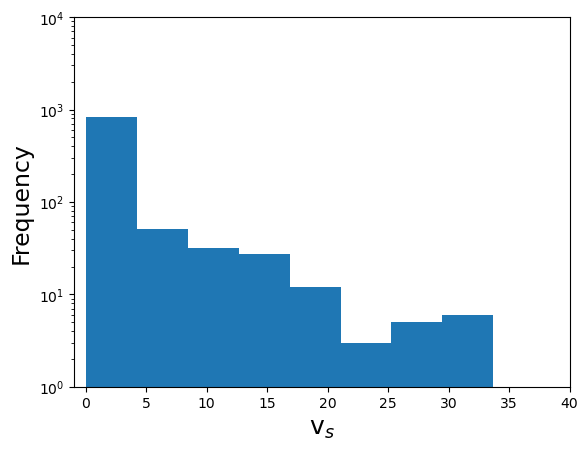

In [28]:
plt.hist(vs,15);
plt.yscale("log")
plt.ylim([1, 10000])
plt.xlim(-1,40)
plt.xlabel('v$_{s}$',fontsize=18)
plt.ylabel('Frequency',fontsize=17)

In [29]:
#calculate kurtosis and skewness via the formulas
np.mean(vs),np.std(vs),scipy.stats.skew(vs),scipy.stats.kurtosis(vs)

(2.5837486565233876, 5.492105088525999, 4.479614261742981, 27.773866185432052)

In [30]:
np.mean(np.abs(vx))

1.646398967764809

In [31]:
np.mean(np.abs(vy))

1.5740910210496615

In [32]:
# Mean
mean = np.mean(vx)

# Variance
var = np.var(vx)

# Normalized data
ndata = vx - mean

acorr = np.correlate(ndata, ndata, 'full')[len(ndata)-1:] 
acorr = acorr / var / len(ndata)

In [33]:
acorr;

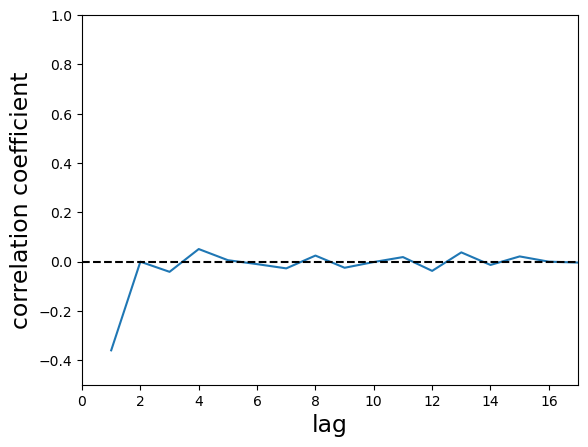

In [34]:
plt.plot(np.arange(1,30),acorr[1:30])
plt.xlim(0,17)
plt.ylim(-0.5,1)
plt.xlabel('lag',fontsize=17)
plt.ylabel('correlation coefficient',fontsize=17)
plt.axhline(y=0, color='black', linestyle='--')

In [35]:
#change variable names. Do also auto-corralation in Y and see if it is somewhat different (perhaps movements are less correlated)
# Mean
mean = np.mean(vs)

# Variance
var = np.var(vs)

# Normalized data
ndata = vs - mean

acorr = np.correlate(ndata, ndata, 'full')[len(ndata)-1:] 
acorr = acorr / var / len(ndata)

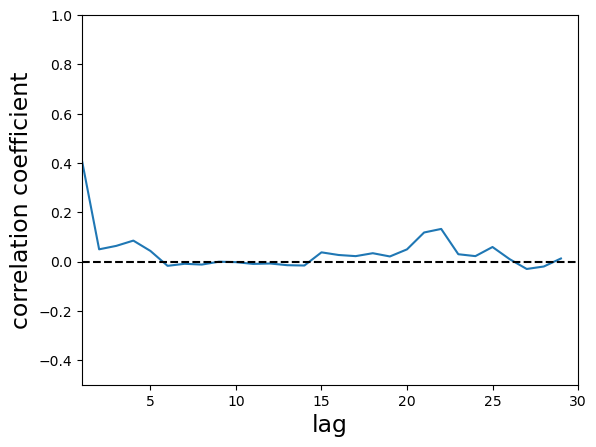

In [36]:

plt.plot(np.arange(1,30),acorr[1:30])
plt.xlim(1,30)
plt.ylim(-0.5,1)
plt.xlabel('lag',fontsize=17)
plt.ylabel('correlation coefficient',fontsize=17)
plt.axhline(y=0, color='black', linestyle='--')

In [37]:
df2= pd.read_excel('46TD.xlsx',engine='openpyxl')
df2 = df2[['RecordingTime [ms]','Point of Regard Right X [px]','Point of Regard Right Y [px]','Category Right','Category Left']]
df2=df2[df2['Point of Regard Right X [px]'] !=0]
df2=df2[df2['Point of Regard Right Y [px]'] !=0]
df2= df2[df2['Category Left'].isin( ['Fixation', 'Saccade' ])]
df2= df2[df2['Category Right'].isin( ['Fixation', 'Saccade' ])]
T2= df2['RecordingTime [ms]']
X2 = df2['Point of Regard Right X [px]']
Y2 = df2['Point of Regard Right Y [px]']
pd.to_numeric(X2, errors='coerce')
pd.to_numeric(Y2, errors='coerce')
pd.to_numeric(T2, errors='coerce')


0       1566935.839
1       1566975.561
2       1566995.422
3       1567049.340
5       1567114.818
           ...     
1885    1618850.718
1886    1618890.468
1887    1618930.239
1888    1618950.247
1889    1618970.096
Name: RecordingTime [ms], Length: 1832, dtype: float64

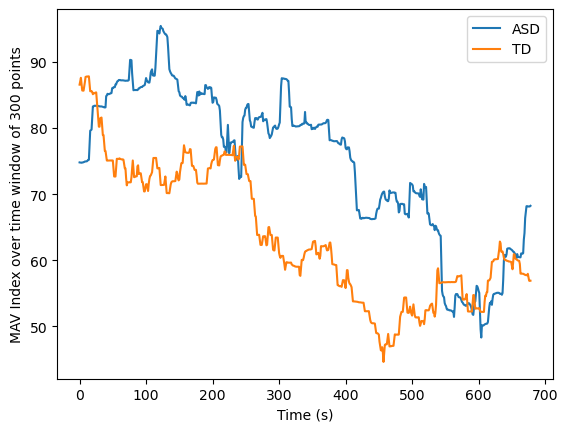

In [38]:
# assuming your data for ASD and TD participants are stored in arrays `data_asd` and `data_td`, respectively

window_size = 300

# Calculate the distance between consecutive points for TD and ASD participants
asd_dist = np.sqrt((np.diff(X)**2) + (np.diff(Y)**2))
td_dist = np.sqrt((np.diff(X2[:979])**2) + (np.diff(Y2[:979])**2))

# calculate the moving average using numpy.convolve
moving_avg_asd = np.convolve(asd_dist, np.ones(window_size)/window_size, mode='valid')
moving_avg_td = np.convolve(td_dist, np.ones(window_size)/window_size, mode='valid')



# plot the results
plt.plot(moving_avg_asd, label='ASD')
plt.plot(moving_avg_td, label='TD')
plt.xlabel('Time (s)')
plt.ylabel('MAV Index over time window of 300 points')
plt.legend()
plt.show()



In [39]:
#ldx is the numpy vector of x velocities
#ldy is the numpy vector of y velocities

def angle_two_vector(ldx,ldy):
    if np.any(np.isnan(ldx)):
        print("nan in input vector")
        return("nan in input vector")
    if np.any(np.isnan(ldy)):
        print("nan in input vector")
        return("nan in input vector")
    if len(ldx) != len(ldy):
        print("len of vectors should be the same")
        return( "len of vectors should be the same")
    angle_vec = []
    for i in range(len(ldx)-1):
        ldx_1 = ldx[i]
        ldx_2 = ldx[i+1]
        ldy_1 = ldy[i]
        ldy_2 = ldy[i+1]
        if (np.sqrt(ldx_1**2 +ldy_1**2)*np.sqrt(ldx_2**2 +ldy_2**2)) ==0:
            angle_vec.append(1)
        else:
            cos = (ldx_1*ldx_2 + ldy_1*ldy_2)/(np.sqrt(ldx_1**2 +ldy_1**2)*np.sqrt(ldx_2**2 +ldy_2**2))
            sin = (ldx_1*ldy_2 - ldy_1*ldx_2)/(np.sqrt(ldx_1**2 +ldy_1**2)*np.sqrt(ldx_2**2 +ldy_2**2))
           
            l_ang = np.angle(cos+sin*1.0j,deg = True)
            if l_ang <0:
                l_ang = 360 + l_ang
       
            angle_vec.append(l_ang)
       
            if 1.000000001 < abs(cos) or 1.000000001 < abs(sin)  :
                print( "error, cosine should be less than one")
       
    return(angle_vec)

def angle_single_vector(ldx,ldy):
    if np.any(np.isnan(ldx)):
        print(  "nan in input vector")
        return( "nan in input vector")
    if np.any(np.isnan(ldy)):
        print( "nan in input vector")
        return( "nan in input vector")
    if len(ldx) != len(ldy):
        print( "len of vectors should be the same")
        return( "len of vectors should be the same")
    angle_vec = []
    for i in range(len(ldx)):
        ldx_1 = ldx[i]
        ldy_1 = ldy[i]
        if (np.sqrt(ldx_1**2 +ldy_1**2)) ==0:
            langle = 0
        else:
            langle = np.angle(ldx_1 + ldy_1*1.0j,deg = True)
            if langle <0:
                langle = 360 + langle
        angle_vec.append(langle)
    return( angle_vec)

In [40]:
angle_two_vector(vx,vy)

[359.9752993738667,
 4.93337317694518,
 205.35423450777708,
 337.15202500043375,
 170.73043843912444,
 61.25609274360001,
 161.03485959997406,
 82.38051330501348,
 45.53006061721871,
 173.50602026514136,
 196.67480759258478,
 351.4456585667861,
 186.63817748247172,
 359.3878616264934,
 232.00433978440537,
 286.14053333758443,
 211.60220299419532,
 350.98211118382545,
 174.59581931345727,
 65.64649294089561,
 112.86831131450494,
 138.20911675139385,
 232.18911925647348,
 178.06409894671282,
 193.89243208628952,
 140.55893424185078,
 190.60352860661857,
 45.787288200310705,
 308.9357875345495,
 217.71428124767687,
 188.50277538425144,
 338.3379010953879,
 186.53017002746415,
 179.9356835953192,
 321.6640032726525,
 214.14946967172278,
 154.75316193325583,
 259.9969271676056,
 288.51887163533536,
 31.97804131162792,
 319.83269728535686,
 20.95932978627286,
 174.6556137390645,
 135.4637885936516,
 83.44694752656221,
 180.90763158979968,
 146.9788811917577,
 336.5834896271037,
 17.422964286

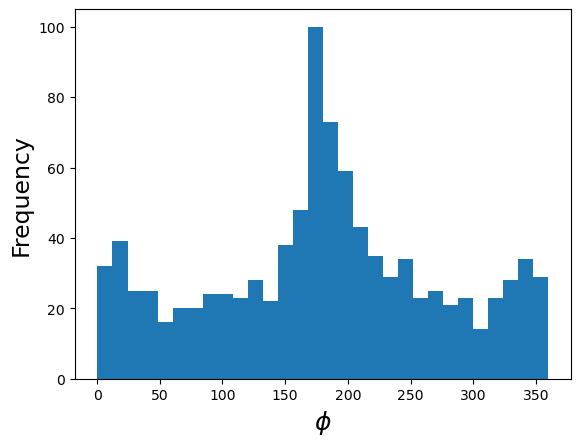

In [41]:
plt.hist(angle_two_vector(vx,vy),30);
plt.xlabel(r'$\phi$',fontsize=18)
plt.ylabel('Frequency',fontsize=17)

plt.show()

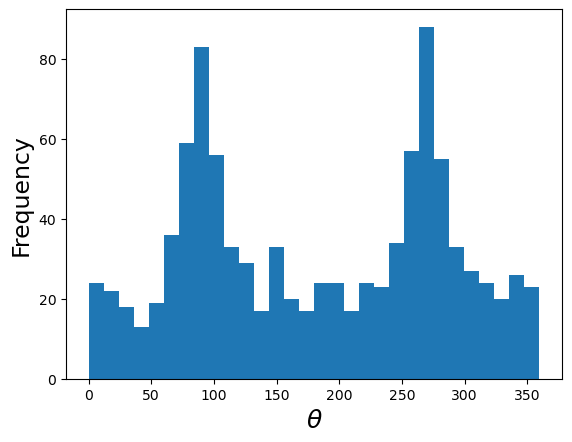

In [42]:
plt.hist(angle_single_vector(vx,vy),30);
plt.xlabel(r'$\theta$',fontsize=18)
plt.ylabel('Frequency',fontsize=17)

plt.show()

In [43]:
df = df.reset_index(drop=True)

In [44]:
# Assuming x_position and y_position are numpy arrays with the same shape
# and represent the position data

# Calculate the time difference between two consecutive samples
dt = 1/60  # Assuming a sampling rate of 60 Hz
dx = np.diff(X)
dy = np.diff(Y)
distance = np.sqrt(dx**2 + dy**2)
velocity_data = distance/dt


In [45]:

# separate fixation and saccade data
fixation_data = df[df['Category Right'] == 'Fixation']
saccade_data = df[df['Category Right'] == 'Saccade']

# calculate velocities
dx_fixation = np.diff(fixation_data['Point of Regard Right X [px]'])
dy_fixation = np.diff(fixation_data['Point of Regard Right Y [px]'])
fixation_velocities = np.sqrt(dx_fixation**2 + dy_fixation**2) * 60  # multiply by 60 to get deg/s

dx_saccade = np.diff(saccade_data['Point of Regard Right X [px]'])
dy_saccade = np.diff(saccade_data['Point of Regard Right Y [px]'])
saccade_velocities = np.sqrt(dx_saccade**2 + dy_saccade**2) * 60  # multiply by 60 to get deg/s


In [46]:
len(fixation_velocities)

650

In [47]:
len(saccade_velocities)

327

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

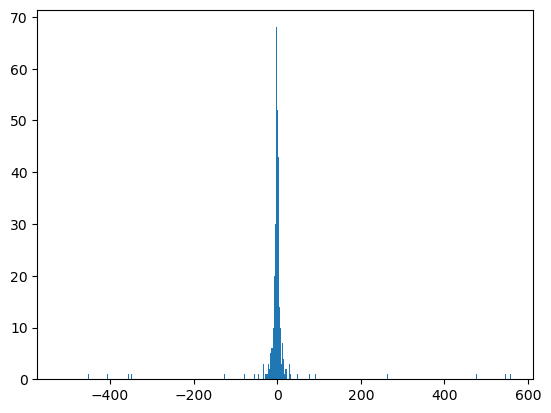

In [48]:
plt.hist(dx_fixation,1000)

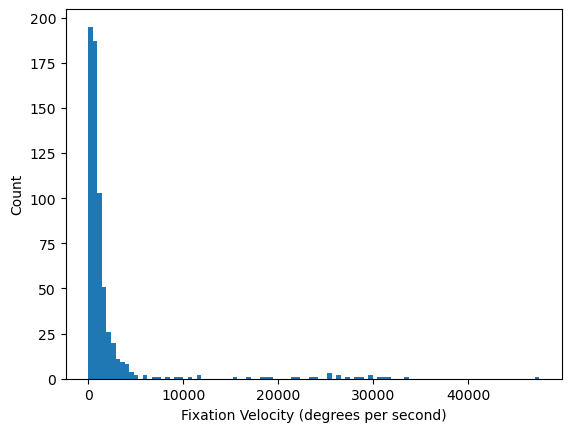

In [49]:
# Plot histogram
plt.hist(fixation_velocities, bins=100)
plt.xlabel("Fixation Velocity (degrees per second)")
plt.ylabel("Count")
plt.show()

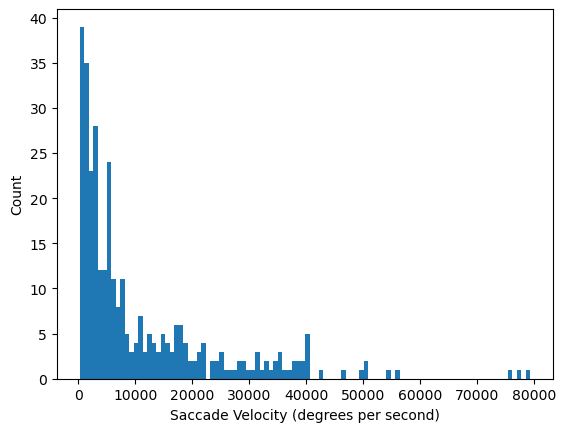

In [50]:
# Plot histogram
plt.hist(saccade_velocities, bins=100)
plt.xlabel("Saccade Velocity (degrees per second)")
plt.ylabel("Count")
plt.show()

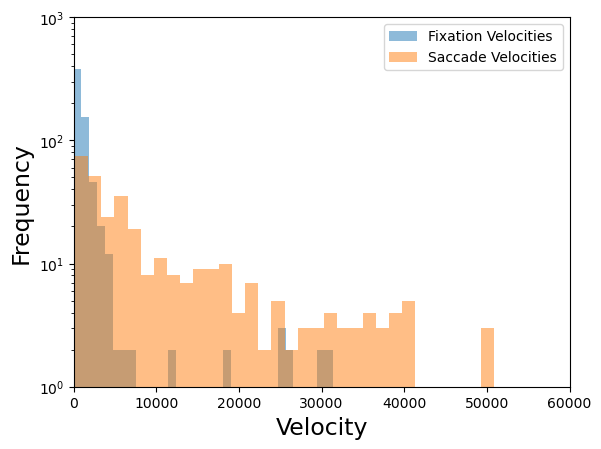

In [51]:

# fixation velocities histogram
plt.hist(fixation_velocities, bins=50, alpha=0.5, label='Fixation Velocities')

# saccade velocities histogram
plt.hist(saccade_velocities, bins=50, alpha=0.5, label='Saccade Velocities')

plt.yscale("log")
plt.ylim([1, 1000])
plt.xlim(-1,60000)
# plot properties
plt.legend(loc='upper right')
plt.xlabel('Velocity',fontsize=17)
plt.ylabel('Frequency',fontsize=17)

# show the plot
plt.show()

In [52]:
df = df.reset_index(drop=True)

In [53]:
# Find transitions from saccade to fixation
s2f_transitions = 0
for i in range(1, len(df)):
    if df['Category Right'][i-1] == 'Saccade' and df['Category Right'][i] == 'Fixation':
        s2f_transitions += 1

# Calculate transition rate
saccade_count = np.sum(df['Category Right'] == 'Saccade')
transition_rate = -np.log(s2f_transitions / (60 * saccade_count))

# Calculate proportion of transitions from saccade to fixation
prop_s2f = s2f_transitions / len(df['Category Right'])

print("Nr of transitions from saccade to fixations:", s2f_transitions)
print("Nr of transitions from saccade to fixations / Nr of points:", prop_s2f)
print("Transition rate (lambda):", transition_rate)

Nr of transitions from saccade to fixations: 65
Nr of transitions from saccade to fixations / Nr of points: 0.06639427987742594
Transition rate (lambda): 5.712970900710607


In [54]:
# Find transitions from fixation to saccade
f2s_transitions = 0
for i in range(1, len(df)):
    if df['Category Right'][i-1] == 'Fixation' and df['Category Right'][i] == 'Saccade':
        f2s_transitions += 1

# Calculate transition rate
fixation_count = np.sum(df['Category Right'] == 'Fixation')
transition_rate = -np.log(f2s_transitions / (60 * fixation_count))

# Calculate proportion of transitions from fixation to saccade
prop_f2s = f2s_transitions / len(df['Category Right'])

print("Nr of transitions from fixation to saccade:", f2s_transitions)
print("Nr of transitions from fixation to saccade / Nr of points:", prop_f2s)
print("Transition rate (lambda):", transition_rate)


Nr of transitions from fixation to saccade: 65
Nr of transitions from fixation to saccade / Nr of points: 0.06639427987742594
Transition rate (lambda): 6.3984669345350325


In [55]:
# Find transitions from fixation to fixation
f2f_transitions = 0
for i in range(1, len(df)):
    if df['Category Right'][i-1] == 'Fixation' and df['Category Right'][i] == 'Fixation':
        f2f_transitions += 1

# Calculate transition rate
fixation_count = np.sum(df['Category Right'] == 'Fixation')
transition_rate = -np.log(f2f_transitions / (60 * fixation_count))

# Calculate proportion of transitions from fixation to fixation
prop_f2f = f2f_transitions / len(df['Category Right'])

print("Nr of transitions from fixation to fixation:", f2f_transitions)
print("Nr of transitions from fixation to fixation / Nr of points:", prop_f2f)
print("Transition rate (lambda):", transition_rate)


Nr of transitions from fixation to fixation: 585
Nr of transitions from fixation to fixation / Nr of points: 0.5975485188968335
Transition rate (lambda): 4.201242357198813


In [56]:
# Find transitions from saccade to saccade
s2s_transitions = 0
for i in range(1, len(df)):
    if df['Category Right'][i-1] == 'Saccade' and df['Category Right'][i] == 'Saccade':
        s2s_transitions += 1

# Calculate transition rate
saccade_count = np.sum(df['Category Right'] == 'Saccade')
transition_rate = -np.log(s2s_transitions / (60 * saccade_count))

# Calculate proportion of transitions from saccade to saccade
prop_s2s = s2s_transitions / len(df['Category Right'])

print("Nr of transitions from saccade to saccade:", s2s_transitions)
print("Nr of transitions from saccade to saccade / Nr of points:", prop_s2s)
print("Transition rate (lambda):", transition_rate)


Nr of transitions from saccade to saccade: 263
Nr of transitions from saccade to saccade / Nr of points: 0.2686414708886619
Transition rate (lambda): 4.31520413842848


In [57]:
from scipy.stats import lognorm

In [58]:
if fixation_velocities.size == 0:
    print("Fixation velocities array is empty")
else:
    min_fixation_velocity = np.min(fixation_velocities)


In [59]:
from scipy.stats import norm

Mean of log fixation velocities: 6.695666535864649
Standard deviation of log fixation velocities: 1.190955667843645
Mean of log saccade velocities: 8.58515062248283
Standard deviation of log saccade velocities: 1.3054060697846193


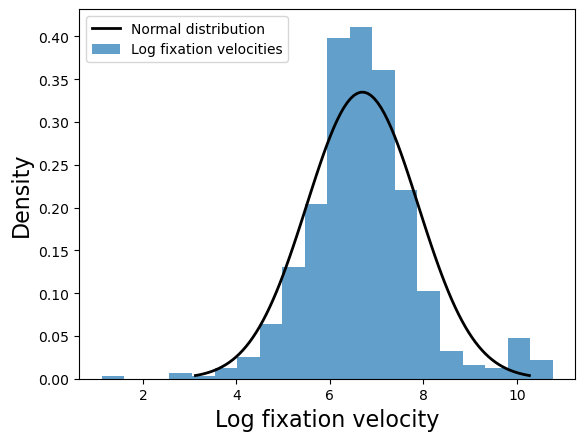

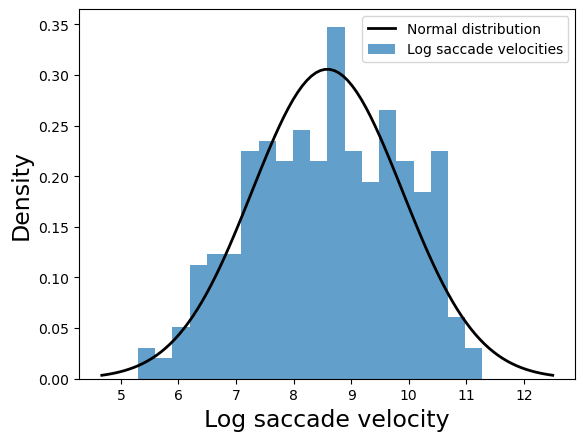

In [60]:
# Take the log of fixation velocities
log_fixation_velocities = np.log(fixation_velocities)

# Fit a normal distribution to the log fixation velocities
mu_f, std_f = norm.fit(log_fixation_velocities)

# Print the mean and standard deviation of the fitted distribution
print("Mean of log fixation velocities:", mu_f)
print("Standard deviation of log fixation velocities:", std_f)

# Take the log of fixation velocities
log_saccade_velocities = np.log(saccade_velocities)

# Fit a normal distribution to the log fixation velocities
mu_s, std_s = norm.fit(log_saccade_velocities)

# Print the mean and standard deviation of the fitted distribution
print("Mean of log saccade velocities:", mu_s)
print("Standard deviation of log saccade velocities:", std_s)

# Create a histogram of the log fixation velocities
plt.hist(np.log(fixation_velocities),20, density=True, alpha=0.7)

# Create a range of x values for the normal distribution
x = np.linspace(mu_f - 3*std_f, mu_f + 3*std_f, 100)

# Create the normal distribution using the mean and standard deviation
y_f = norm.pdf(x, mu_f, std_f)

# Plot the normal distribution on top of the histogram
plt.plot(x, y_f, 'k', linewidth=2)

# Add labels and a legend to the plot
plt.xlabel('Log fixation velocity',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.legend(['Normal distribution', 'Log fixation velocities'])

# Show the plot
plt.show()

# Create a histogram of the log fixation velocities
plt.hist(np.log(saccade_velocities),20, density=True, alpha=0.7)
# Create a range of x values for the normal distribution
x = np.linspace(mu_s - 3*std_s, mu_s + 3*std_s, 100)

# Create the normal distribution using the mean and standard deviation
y_s = norm.pdf(x, mu_s, std_s)

# Plot the normal distribution on top of the histogram
plt.plot(x, y_s, 'k', linewidth=2)

# Add labels and a legend to the plot
plt.xlabel('Log saccade velocity',fontsize=17)
plt.ylabel('Density',fontsize=17)
plt.legend(['Normal distribution', 'Log saccade velocities'])

# Show the plot
plt.show()
